<a href="https://colab.research.google.com/github/ptoledoc7/Prueba/blob/main/Trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plazo Fijo: Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

## Variables

|VARIABLE|DESCRIPTION|
|--------|-----------|
|Unnamed: 0|Numero de Cliente|
|age|Edad del cliente|
|job|Tipo de trabajo del cliente|
|marital|Estado civil del cliente|
|education|Nivel de educación del cliente|
|default|¿Tiene crédito en default? (Mora)|
|balance|Saldo medio anual|
|housing|¿Tiene préstamo de vivienda?|
|loan|¿Tiene préstamo personal?|
|contact|tipo de comunicación del contacto|
|day|último día de contacto del mes|
|month|último mes de contacto del año|
|duration|duración del último contacto, en segundos|
|campaign|Número de contactos realizados durante esta campaña|
|pdays|Número de días después de una campaña anterior|
|previous|Número de contactos realizados antes de esta campaña|
|poutcome|resultado de la campaña de marketing anterior|
|y|¿El cliente ha suscrito un depósito a plazo?|


## Funciones

In [2]:
def review_measures(data, num_var):
    print(f'Mean: {data[num_var].mean():.2f}')
    print(f'Median: {data[num_var].median():.2f}')
    print(f'Mode: {data[num_var].mode()[0]:.2f}\n')

    print(f'Deviation: {data[num_var].std():.2f}')
    print(f'Minimum: {data[num_var].min():.2f}')
    print(f'Maximum: {data[num_var].max():.2f}')
    print(f'Range: {data[num_var].max() - data[num_var].min():.2f}')

In [3]:
def plot_categorical(data, cat_var, num_var):
    plt.figure(figsize=(15,5))

    sns.barplot(data=data, x=cat_var, y=num_var)

    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.show()

In [4]:
def plot_hist_box(data, num_var):
    plt.figure(figsize=(10,7))

    plt.subplot(2,1,1)
    plt.title('Histograma')
    sns.histplot(data=data, x=num_var)
    plt.gca().set_xlabel('')
    plt.gca().set_ylabel('')

    plt.subplot(2,1,2)
    plt.title('Boxplot')
    sns.boxplot(data=data, x=num_var)
    plt.gca().set_xlabel('')

    plt.show()

In [5]:
def calcular_outliers(data, num_var):
    Q1 = data[num_var].quantile(0.25)
    Q3 = data[num_var].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 3 * IQR
    limite_superior = Q3 + 3 * IQR
    outliers = data[(data[num_var] < limite_inferior)
               | (data[num_var] > limite_superior)].shape[0]

    return limite_inferior, limite_superior, outliers

## Load Data

In [6]:
df = pd.read_csv('bank_data.csv')
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## Analysis

In [ ]:
df.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [ ]:
df.nunique()

Unnamed: 0    4521
age             67
job             12
marital          3
education        4
default          2
balance       2353
housing          2
loan             2
contact          3
day             31
month           12
duration       875
campaign        32
pdays          292
previous        24
poutcome         4
y                2
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,2260.000000,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,1305.244613,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,1130.000000,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2260.000000,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3390.000000,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,4520.000000,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### age

In [ ]:
review_measures(df, 'age')

Mean: 41.17
Median: 39.00
Mode: 34.00

Deviation: 10.58
Minimum: 19.00
Maximum: 87.00
Range: 68.00


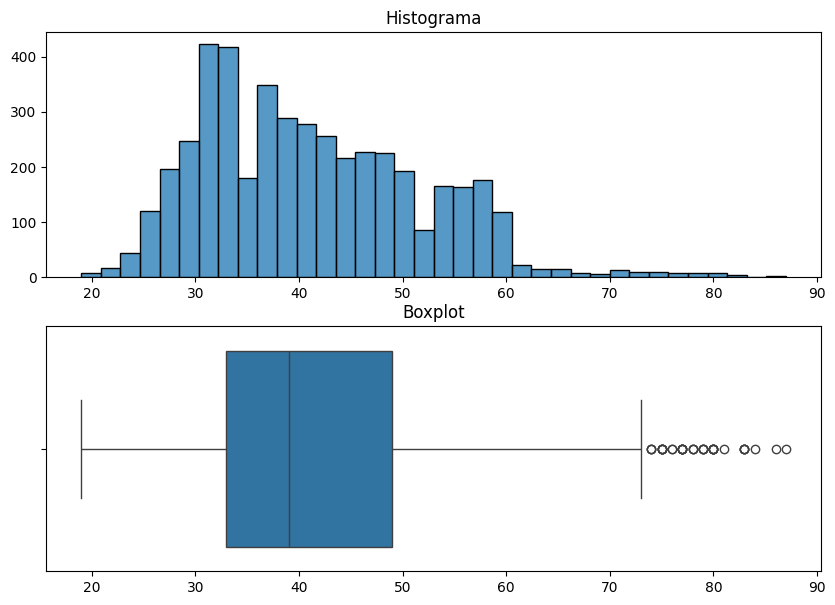

In [ ]:
plot_hist_box(df, 'age')

### job

In [ ]:
df_job = df['job'].value_counts().sort_index().reset_index(name='Absolute')
df_job['Relative'] = df_job['Absolute'] / df_job['Absolute'].sum() * 100
df_job

,job,Absolute,Relative
0,admin.,478,10.572882
1,blue-collar,946,20.924574
2,entrepreneur,168,3.715992
3,housemaid,112,2.477328
4,management,969,21.433311
5,retired,230,5.087370
6,self-employed,183,4.047777
7,services,417,9.223623
8,student,84,1.857996
9,technician,768,16.987392


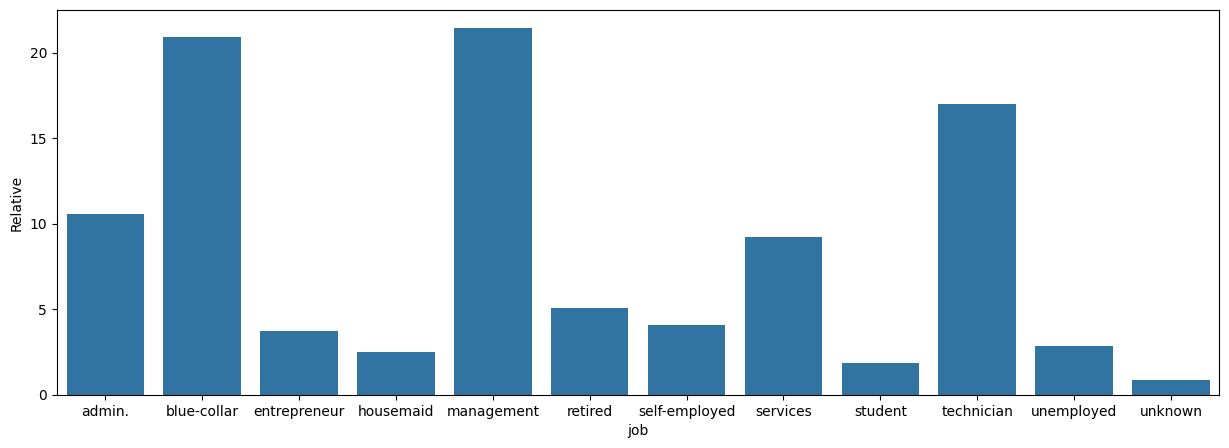

In [ ]:
plot_categorical(df_job, 'job', 'Relative')

### marital

In [ ]:
df_marital = df['marital'].value_counts().sort_index().reset_index(name='Absolute')
df_marital['Relative'] = df_marital['Absolute'] / df_marital['Absolute'].sum() * 100
df_marital

,marital,Absolute,Relative
0,divorced,528,11.678832
1,married,2797,61.866844
2,single,1196,26.454324


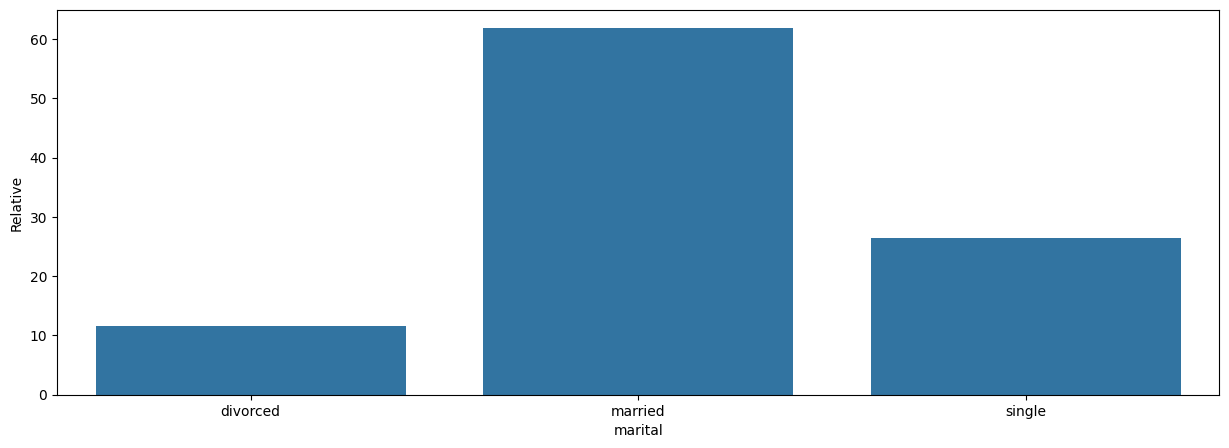

In [ ]:
plot_categorical(df_marital, 'marital', 'Relative')

### education

In [ ]:
df_education = df['education'].value_counts().sort_index().reset_index(name='Absolute')
df_education['Relative'] = df_education['Absolute'] / df_education['Absolute'].sum() * 100
df_education

,education,Absolute,Relative
0,primary,678,14.996682
1,secondary,2306,51.006415
2,tertiary,1350,29.860650
3,unknown,187,4.136253


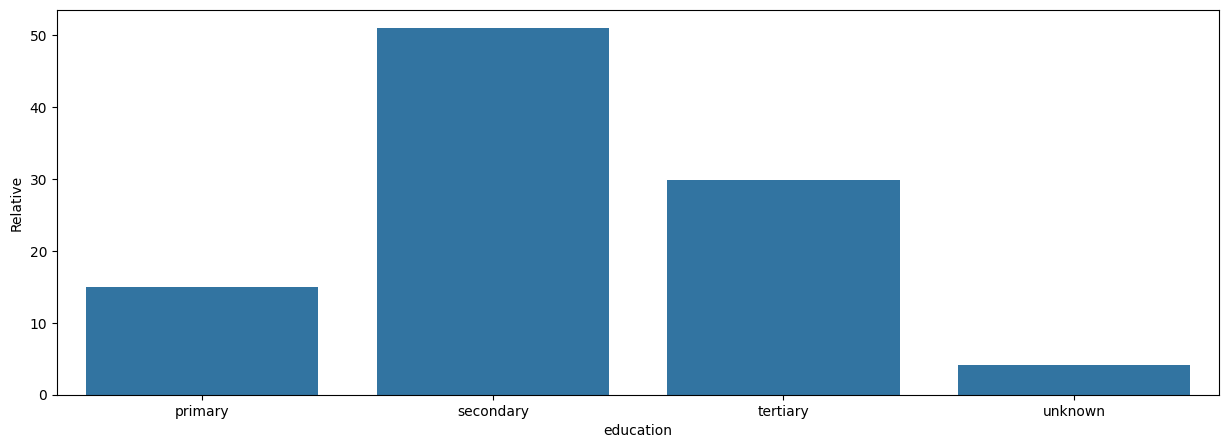

In [ ]:
plot_categorical(df_education, 'education', 'Relative')

### default

In [ ]:
df_default = df['default'].value_counts().sort_index().reset_index(name='Absolute')
df_default['Relative'] = df_default['Absolute'] / df_default['Absolute'].sum() * 100
df_default

,default,Absolute,Relative
0,no,4445,98.318956
1,yes,76,1.681044


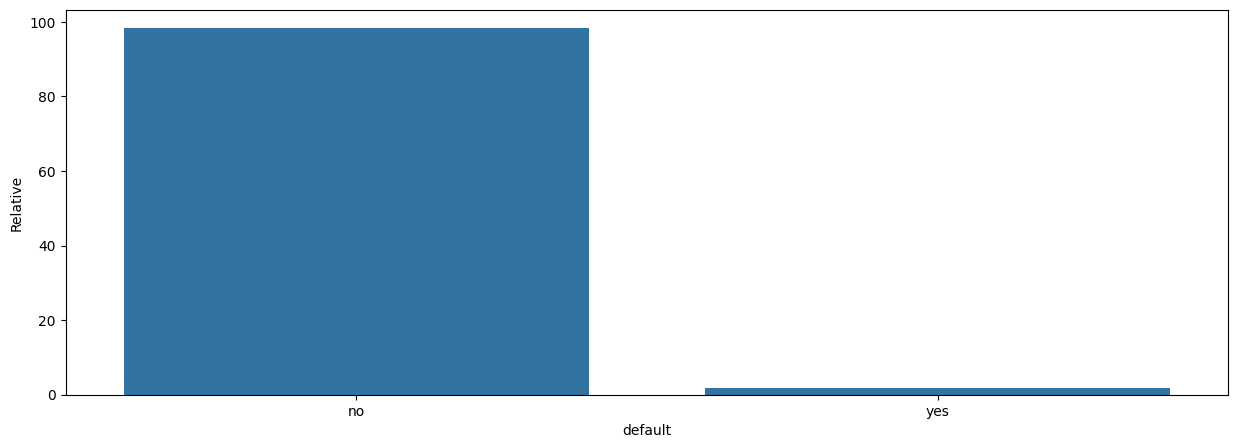

In [ ]:
plot_categorical(df_default, 'default', 'Relative')

### balance

In [ ]:
review_measures(df, 'balance')

Mean: 1422.66
Median: 444.00
Mode: 0.00

Deviation: 3009.64
Minimum: -3313.00
Maximum: 71188.00
Range: 74501.00


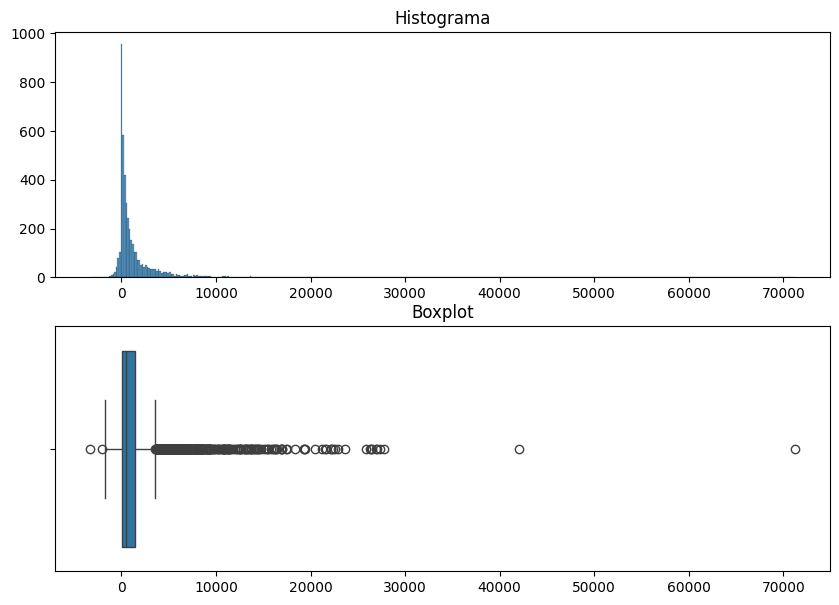

In [ ]:
plot_hist_box(df, 'balance')

### housing

In [ ]:
df_housing = df['housing'].value_counts().sort_index().reset_index(name='Absolute')
df_housing['Relative'] = df_housing['Absolute'] / df_housing['Absolute'].sum() * 100
df_housing

,housing,Absolute,Relative
0,no,1962,43.397478
1,yes,2559,56.602522


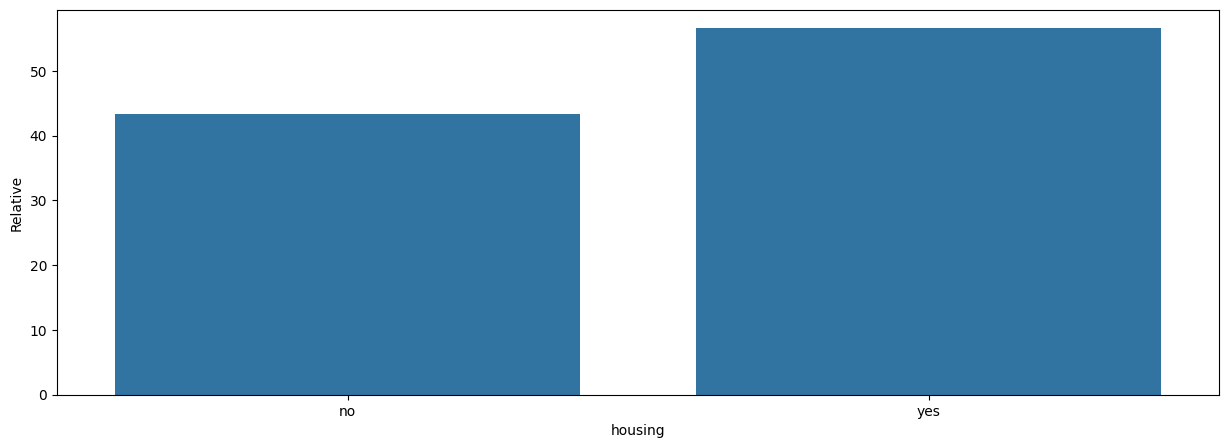

In [ ]:
plot_categorical(df_housing, 'housing', 'Relative')

### loan

In [ ]:
df_loan = df['loan'].value_counts().sort_index().reset_index(name='Absolute')
df_loan['Relative'] = df_loan['Absolute'] / df_loan['Absolute'].sum() * 100
df_loan

,loan,Absolute,Relative
0,no,3830,84.715771
1,yes,691,15.284229


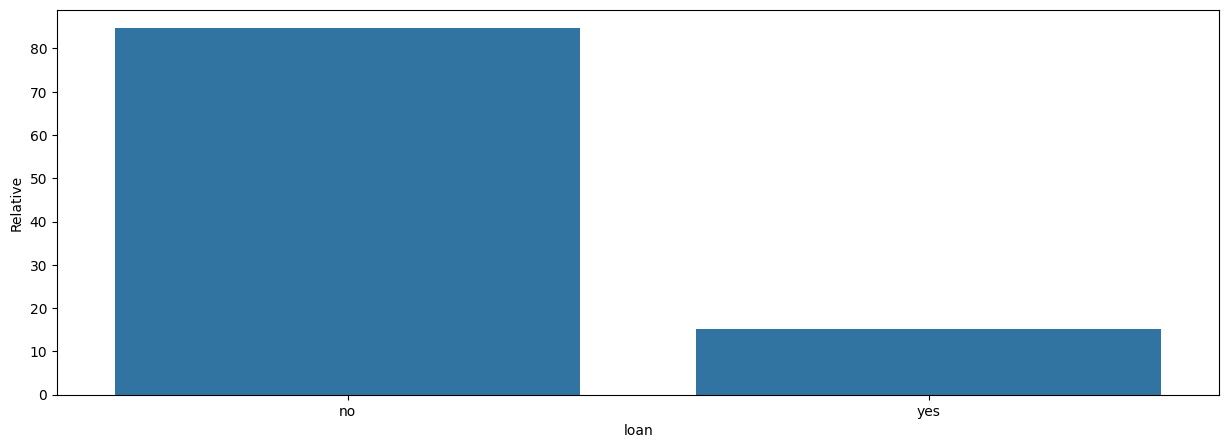

In [ ]:
plot_categorical(df_loan, 'loan', 'Relative')

### contact

In [ ]:
df_contact = df['contact'].value_counts().sort_index().reset_index(name='Absolute')
df_contact['Relative'] = df_contact['Absolute'] / df_contact['Absolute'].sum() * 100
df_contact

,contact,Absolute,Relative
0,cellular,2896,64.056625
1,telephone,301,6.657819
2,unknown,1324,29.285556


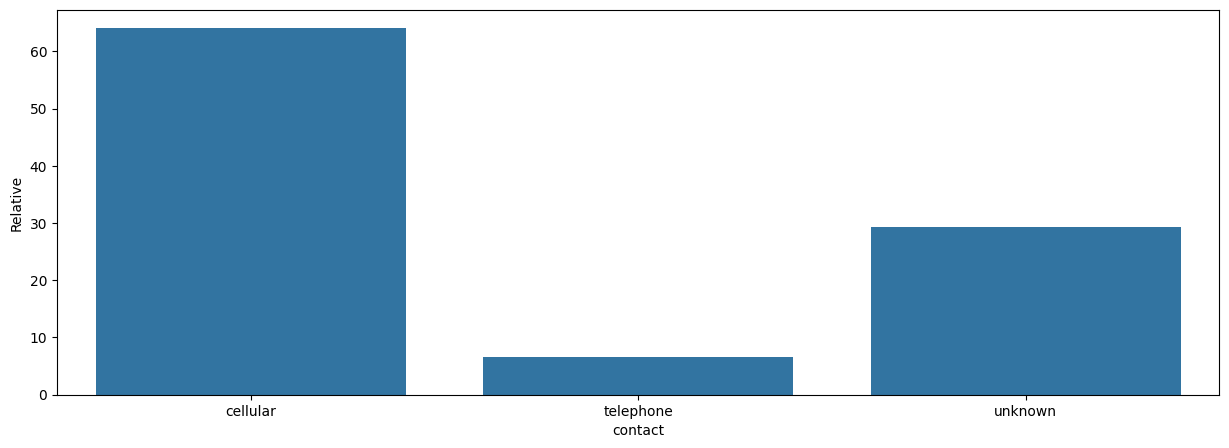

In [ ]:
plot_categorical(df_contact, 'contact', 'Relative')

### day

In [ ]:
review_measures(df, 'day')

Mean: 15.92
Median: 16.00
Mode: 20.00

Deviation: 8.25
Minimum: 1.00
Maximum: 31.00
Range: 30.00


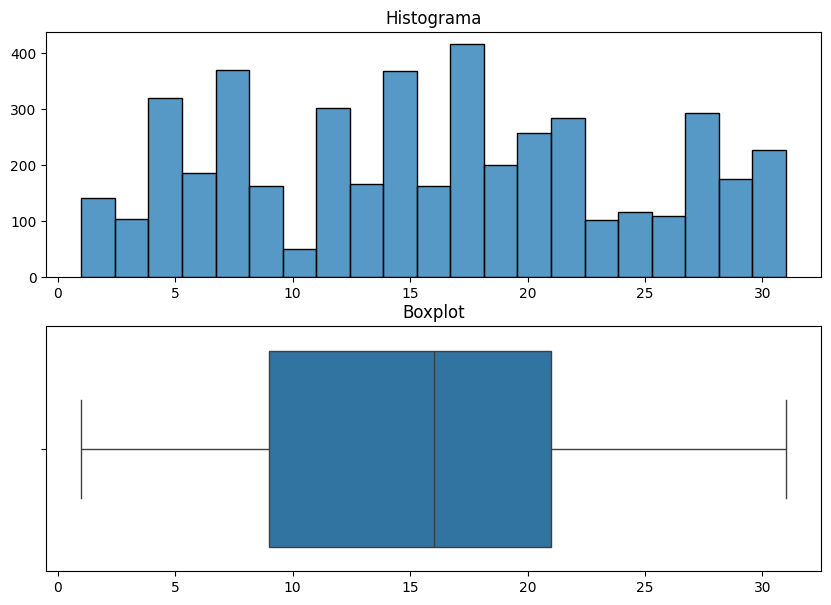

In [ ]:
plot_hist_box(df, 'day')

### month

In [ ]:
df_month = df['month'].value_counts().sort_index().reset_index(name='Absolute')
df_month['Relative'] = df_month['Absolute'] / df_month['Absolute'].sum() * 100
df_month

,month,Absolute,Relative
0,apr,293,6.480867
1,aug,633,14.001327
2,dec,20,0.442380
3,feb,222,4.910418
4,jan,148,3.273612
5,jul,706,15.616014
6,jun,531,11.745189
7,mar,49,1.083831
8,may,1398,30.922362
9,nov,389,8.604291


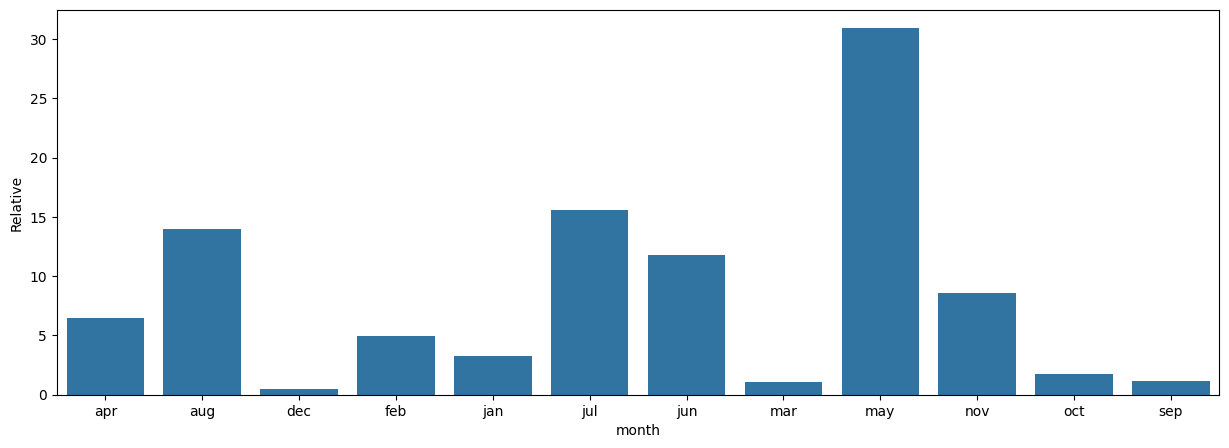

In [ ]:
plot_categorical(df_month, 'month', 'Relative')

### duration

In [ ]:
review_measures(df, 'duration')

Mean: 263.96
Median: 185.00
Mode: 123.00

Deviation: 259.86
Minimum: 4.00
Maximum: 3025.00
Range: 3021.00


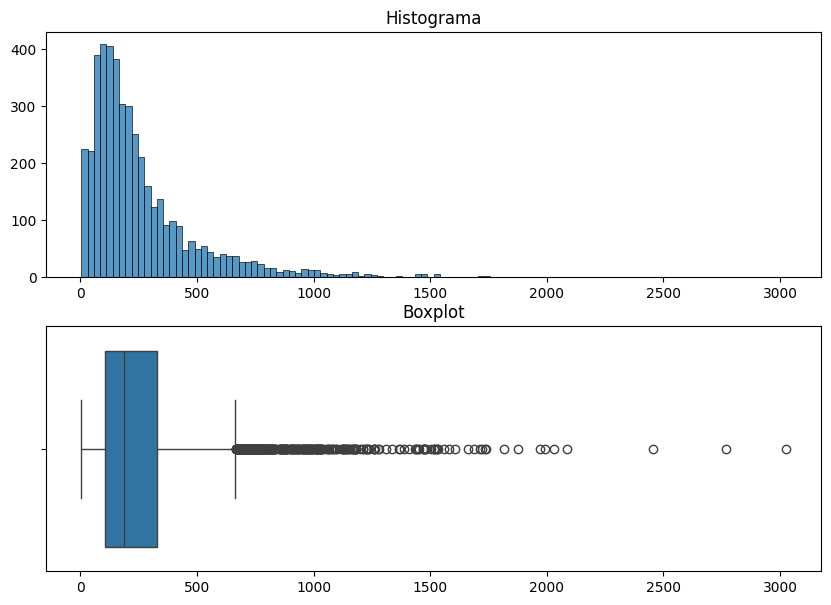

In [ ]:
plot_hist_box(df, 'duration')

### campaign

In [ ]:
review_measures(df, 'campaign')

Mean: 2.79
Median: 2.00
Mode: 1.00

Deviation: 3.11
Minimum: 1.00
Maximum: 50.00
Range: 49.00


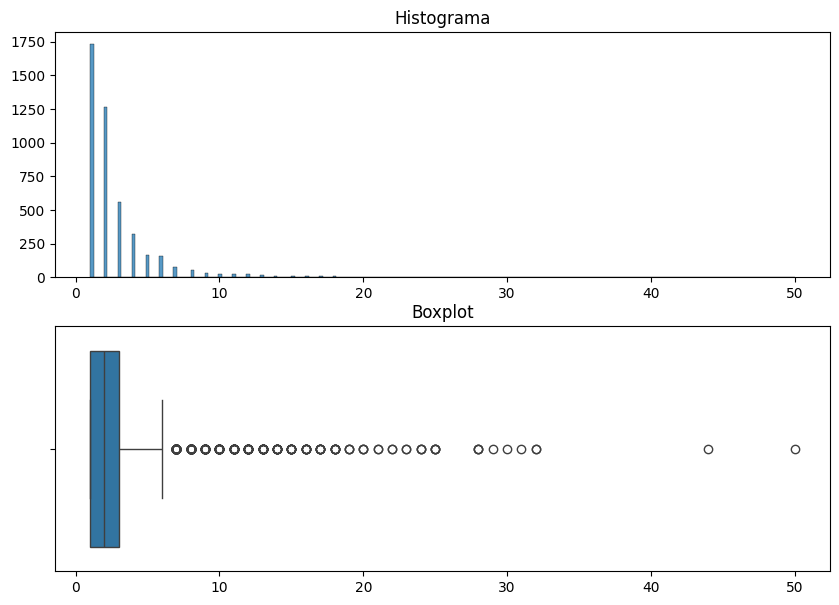

In [ ]:
plot_hist_box(df, 'campaign')

### pdays

In [ ]:
review_measures(df, 'pdays')

Mean: 39.77
Median: -1.00
Mode: -1.00

Deviation: 100.12
Minimum: -1.00
Maximum: 871.00
Range: 872.00


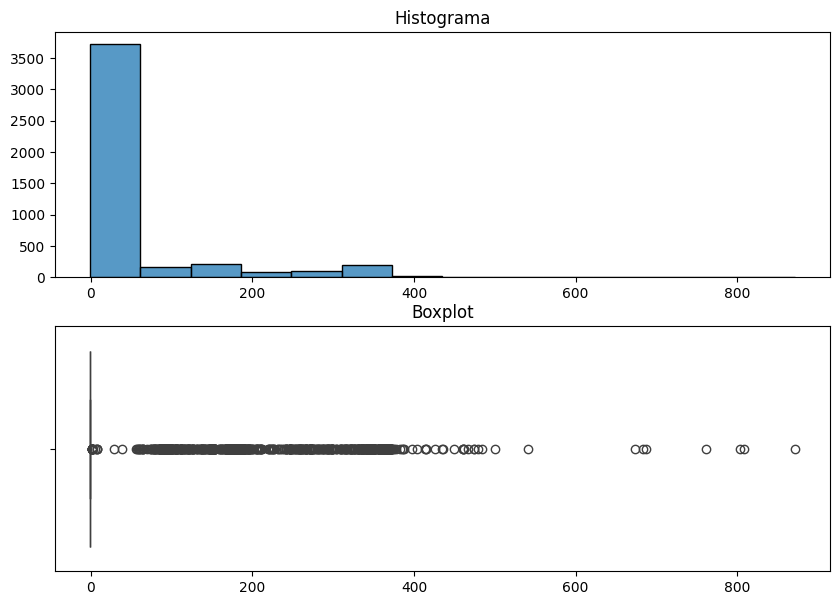

In [ ]:
plot_hist_box(df, 'pdays')

### previous

In [ ]:
review_measures(df, 'previous')

Mean: 0.54
Median: 0.00
Mode: 0.00

Deviation: 1.69
Minimum: 0.00
Maximum: 25.00
Range: 25.00


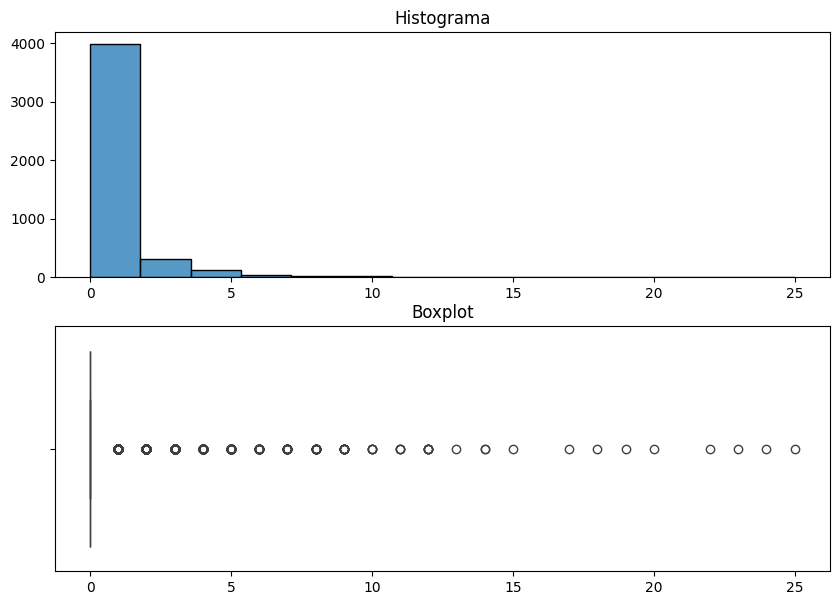

In [ ]:
plot_hist_box(df, 'previous')

### poutcome

In [ ]:
df_poutcome = df['poutcome'].value_counts().sort_index().reset_index(name='Absolute')
df_poutcome['Relative'] = df_poutcome['Absolute'] / df_poutcome['Absolute'].sum() * 100
df_poutcome

,poutcome,Absolute,Relative
0,failure,490,10.838310
1,other,197,4.357443
2,success,129,2.853351
3,unknown,3705,81.950896


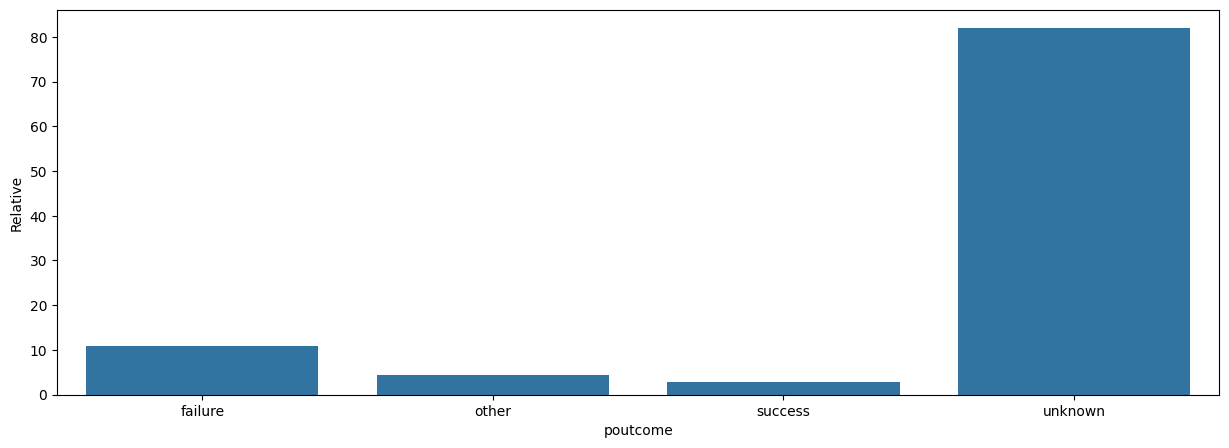

In [ ]:
plot_categorical(df_poutcome, 'poutcome', 'Relative')

### y

In [ ]:
df_y = df['y'].value_counts().sort_index().reset_index(name='Absolute')
df_y['Relative'] = df_y['Absolute'] / df_y['Absolute'].sum() * 100
df_y

,y,Absolute,Relative
0,no,4000,88.476001
1,yes,521,11.523999


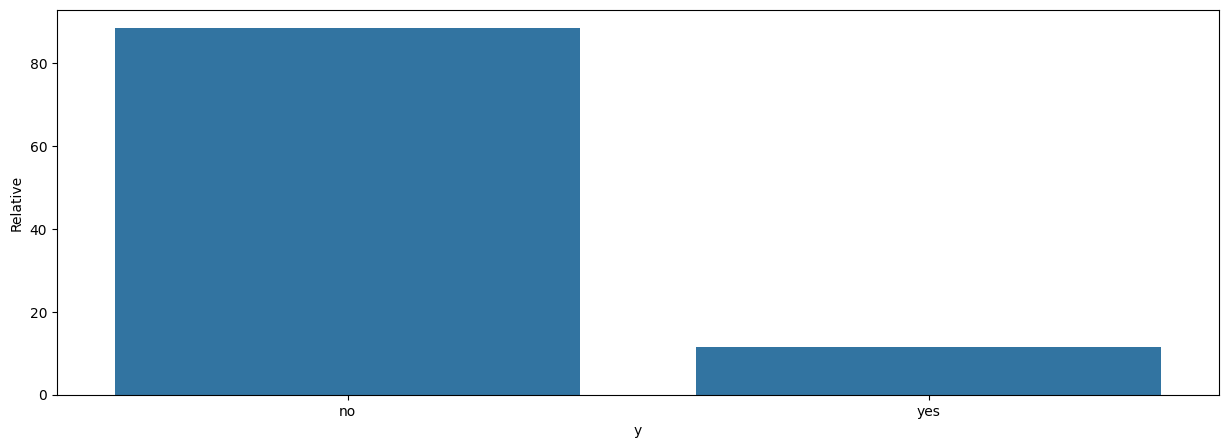

In [ ]:
plot_categorical(df_y, 'y', 'Relative')

## Transform

#### Feature Selection

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3659,52,technician,married,secondary,no,64,no,no,telephone,29,aug,20,2,-1,0,unknown,no
3280,60,blue-collar,married,unknown,no,104,yes,no,unknown,5,may,22,1,-1,0,unknown,no
2316,43,entrepreneur,married,tertiary,no,13342,yes,no,cellular,18,nov,465,1,-1,0,unknown,no


In [ ]:
print(df[df.duplicated])

# df.drop_duplicates(inplace=True)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


## Outliers

### balance

In [7]:
balance_min, balance_max, balance_outliers = calcular_outliers(df, 'balance')

print(f'Limite Inferior: {balance_min:.2f}')
print(f'Limite Superior: {balance_max:.2f}')
print(f'Outliers: {balance_outliers}')

Limite Inferior: -4164.00
Limite Superior: 5713.00
Outliers: 255


In [8]:
df1 = df[(df['balance'] >= balance_min) & (df['balance'] <= balance_max)]

print(df1.shape[0])

4266


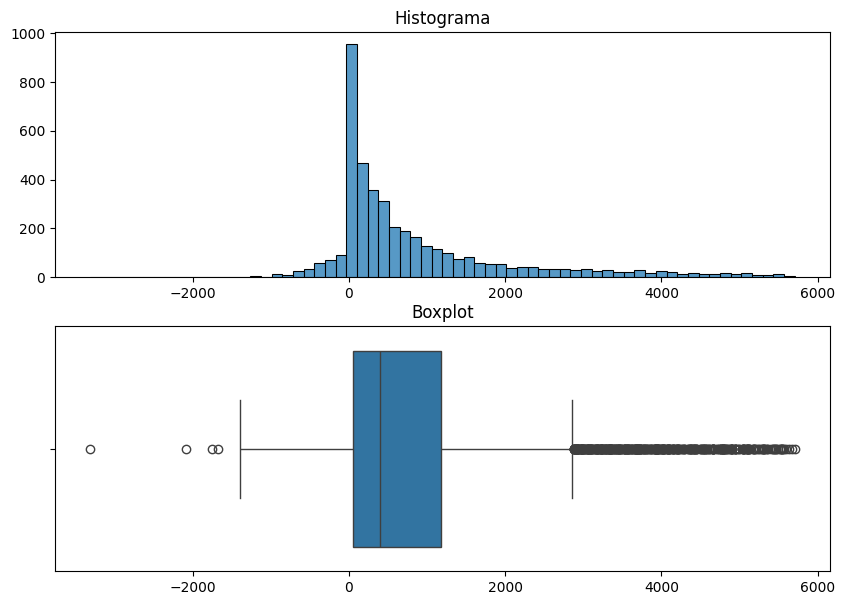

In [9]:
plot_hist_box(df1, 'balance')

### duration

In [10]:
duration_min, duration_max, duration_outliers = calcular_outliers(df, 'duration')

print(f'Limite Inferior: {duration_min:.2f}')
print(f'Limite Superior: {duration_max:.2f}')
print(f'Outliers: {duration_outliers}')

Limite Inferior: -571.00
Limite Superior: 1004.00
Outliers: 107


In [11]:
df1 = df[(df['duration'] >= duration_min) & (df['duration'] <= duration_max)]

print(df1.shape[0])

4414


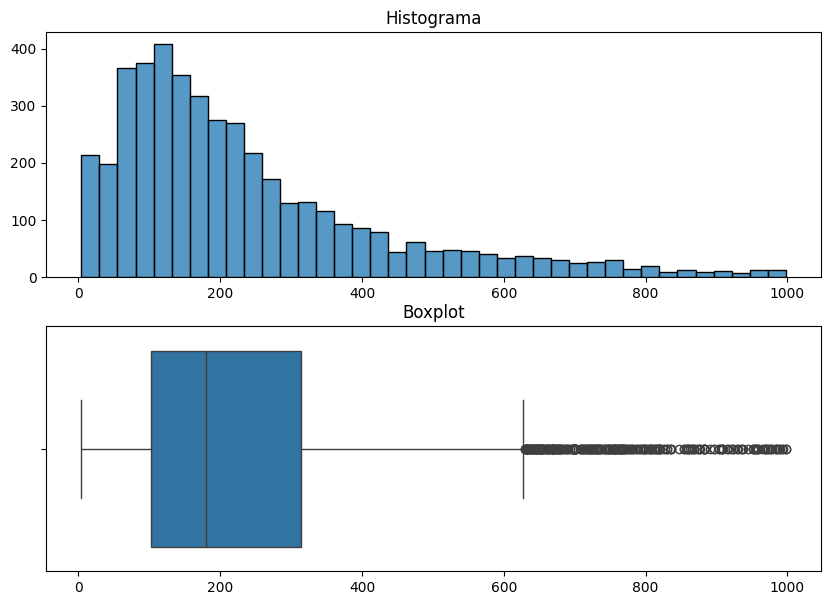

In [12]:
plot_hist_box(df1, 'duration')

In [ ]:
# Si bien existen otras variables que tienen outliers (age, campaign, pdays y previous),
# se determino No eliminar outliers, porque todos sus datos son importantes para realizar un modelo mas preciso.

## Encoding

### job

In [16]:
label_encoder = LabelEncoder() # Se utilizo este encoder por ser una variable categorica nominal
df1['job'] = label_encoder.fit_transform(df1['job'])

df1.sample(3)

<ipython-input-16-025af3d9d42e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['job'] = label_encoder.fit_transform(df1['job'])


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
363,363,49,1,married,secondary,no,2039,yes,no,cellular,18,nov,283,2,-1,0,unknown,no
1264,1264,54,10,married,primary,no,541,yes,no,cellular,3,feb,237,3,-1,0,unknown,no
4248,4248,36,1,married,primary,no,398,yes,no,unknown,12,jun,278,1,-1,0,unknown,no


### marital

In [17]:
label_encoder = LabelEncoder() # Se utilizo este encoder por ser una variable categorica nominal
df1['marital'] = label_encoder.fit_transform(df1['marital'])

df1.sample(3)

<ipython-input-17-d7dfc00b78c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['marital'] = label_encoder.fit_transform(df1['marital'])


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4499,4499,45,1,0,primary,no,942,no,no,cellular,21,nov,362,1,-1,0,unknown,no
2101,2101,48,9,1,secondary,no,4265,yes,no,unknown,13,may,220,2,-1,0,unknown,no
1308,1308,48,9,1,tertiary,no,0,no,no,telephone,26,aug,176,15,-1,0,unknown,no


### education

In [18]:
label_encoder = LabelEncoder() # Se utilizo este encoder por ser una variable categorica nominal
df1['education'] = label_encoder.fit_transform(df1['education'])

df1.sample(3)

<ipython-input-18-f95b59e7fa3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['education'] = label_encoder.fit_transform(df1['education'])


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3630,3630,44,9,0,3,no,759,yes,no,unknown,23,may,397,1,-1,0,unknown,no
2398,2398,51,2,1,1,yes,-2082,no,yes,cellular,28,jul,123,6,-1,0,unknown,no
584,584,52,9,1,1,no,192,yes,no,cellular,23,jul,61,2,-1,0,unknown,no


### default

In [19]:
df1['default'] = np.where(df1['default'] == 'yes', 1, 0) # Se utilizo este encoder por ser una variable categorica de solo 2 opciones

df1.sample(3)

<ipython-input-19-b72b73f0a66d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['default'] = np.where(df1['default'] == 'yes', 1, 0) # Se utilizo este encoder por ser una variable categorica de solo 2 opciones


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
301,301,65,5,0,0,0,1840,no,no,cellular,1,jun,383,2,188,5,failure,no
3747,3747,37,1,1,1,0,140,yes,yes,cellular,7,may,490,1,-1,0,unknown,no
1739,1739,49,3,1,0,0,889,no,no,telephone,7,jul,388,1,-1,0,unknown,yes


In [20]:
df1['housing'] = np.where(df1['housing'] == 'yes', 1, 0)

df1.sample(3)

<ipython-input-20-d9d98b0be884>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['housing'] = np.where(df1['housing'] == 'yes', 1, 0)


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2828,2828,38,9,1,1,0,1960,1,no,cellular,21,aug,161,2,-1,0,unknown,no
4168,4168,31,0,1,1,0,3,1,no,cellular,28,jul,37,12,-1,0,unknown,no
1512,1512,27,0,2,1,0,3638,0,no,cellular,11,jul,271,5,-1,0,unknown,no


In [21]:
df1['loan'] = np.where(df1['loan'] == 'yes', 1, 0)

df1.sample(3)

<ipython-input-21-da8382fc3e4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan'] = np.where(df1['loan'] == 'yes', 1, 0)


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
628,628,45,9,1,1,0,88,0,0,cellular,29,aug,150,2,-1,0,unknown,no
1789,1789,41,1,1,1,0,641,1,0,unknown,13,may,161,1,-1,0,unknown,no
2102,2102,46,2,1,2,0,2262,0,0,telephone,14,jul,44,14,-1,0,unknown,no


In [22]:
label_encoder = LabelEncoder() # Se utilizo este encoder por ser una variable categorica nominal
df1['contact'] = label_encoder.fit_transform(df1['contact'])

df1.sample(3)

<ipython-input-22-153a82cbc6fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['contact'] = label_encoder.fit_transform(df1['contact'])


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1571,1571,36,1,1,0,0,49,1,0,0,15,may,232,2,365,5,other,no
555,555,37,0,1,1,0,1314,1,0,0,8,may,682,2,85,7,success,no
4488,4488,31,10,2,1,0,315,0,0,0,30,jan,130,1,2,1,other,no


In [23]:
label_encoder = LabelEncoder() # Se utilizo este encoder por ser una variable categorica nominal
df1['month'] = label_encoder.fit_transform(df1['month'])

df1.sample(3)

<ipython-input-23-227c31f9f38c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = label_encoder.fit_transform(df1['month'])


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3710,3710,34,6,1,2,0,263,0,0,0,4,8,203,1,78,8,other,no
2772,2772,48,4,2,2,0,414,0,0,0,21,5,761,2,-1,0,unknown,no
1634,1634,42,10,0,1,0,759,0,0,0,28,4,97,1,169,3,failure,no


In [24]:
label_encoder = LabelEncoder() # Se utilizo este encoder por ser una variable categorica nominal
df1['poutcome'] = label_encoder.fit_transform(df1['poutcome'])

df1.sample(3)

<ipython-input-24-abc042054f0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['poutcome'] = label_encoder.fit_transform(df1['poutcome'])


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4241,4241,30,9,2,2,0,411,0,0,0,21,0,142,1,-1,0,3,no
1896,1896,35,4,2,2,0,0,0,0,0,29,1,669,6,-1,0,3,no
1,1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,no


In [25]:
df1['y'] = np.where(df1['y'] == 'yes', 1, 0) # Se utilizo este encoder por ser una variable categorica de solo 2 opciones

df1.sample(3)

<ipython-input-25-40f118b32ae9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y'] = np.where(df1['y'] == 'yes', 1, 0) # Se utilizo este encoder por ser una variable categorica de solo 2 opciones


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2382,2382,26,4,2,2,0,122,0,1,0,8,5,160,1,-1,0,3,0
1624,1624,58,9,1,1,0,116,0,0,2,16,6,580,3,-1,0,3,0
1749,1749,40,9,2,2,0,825,1,0,0,20,0,38,1,335,1,1,0


## Normalizacion

In [28]:
num_cols = ['age','job','marital','education','default','balance','housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

df_train = df1[num_cols].copy()

df_train.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3388,49,7,1,1,0,66,1,1,0,21,9,59,4,-1,0,3,0
3401,32,10,2,2,0,336,1,0,2,8,8,139,1,-1,0,3,0
4080,40,1,1,0,0,2805,1,0,0,14,8,173,6,353,23,0,0


In [29]:
num_cols = ['age','job','marital','education','default','balance','housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

normalizer = MinMaxScaler()
df_train[num_cols] = normalizer.fit_transform(df1[num_cols])
print(df_train.head())

        age       job  marital  education  default   balance  housing  loan  \
0  0.161765  0.909091      0.5   0.000000      0.0  0.068455      0.0   0.0   
1  0.205882  0.636364      0.5   0.333333      0.0  0.108750      1.0   1.0   
2  0.235294  0.363636      1.0   0.666667      0.0  0.062590      1.0   0.0   
3  0.161765  0.363636      0.5   0.666667      0.0  0.064281      1.0   1.0   
4  0.588235  0.090909      0.5   0.333333      0.0  0.044469      1.0   0.0   

   contact       day     month  duration  campaign     pdays  previous  \
0      0.0  0.600000  0.909091  0.075453  0.000000  0.000000      0.00   
1      0.0  0.333333  0.727273  0.217304  0.000000  0.389908      0.16   
2      0.0  0.500000  0.000000  0.182093  0.000000  0.379587      0.04   
3      1.0  0.066667  0.545455  0.196177  0.061224  0.000000      0.00   
4      1.0  0.133333  0.727273  0.223340  0.000000  0.000000      0.00   

   poutcome    y  
0       1.0  0.0  
1       0.0  0.0  
2       0.0  0.0  
3   

## Correlation

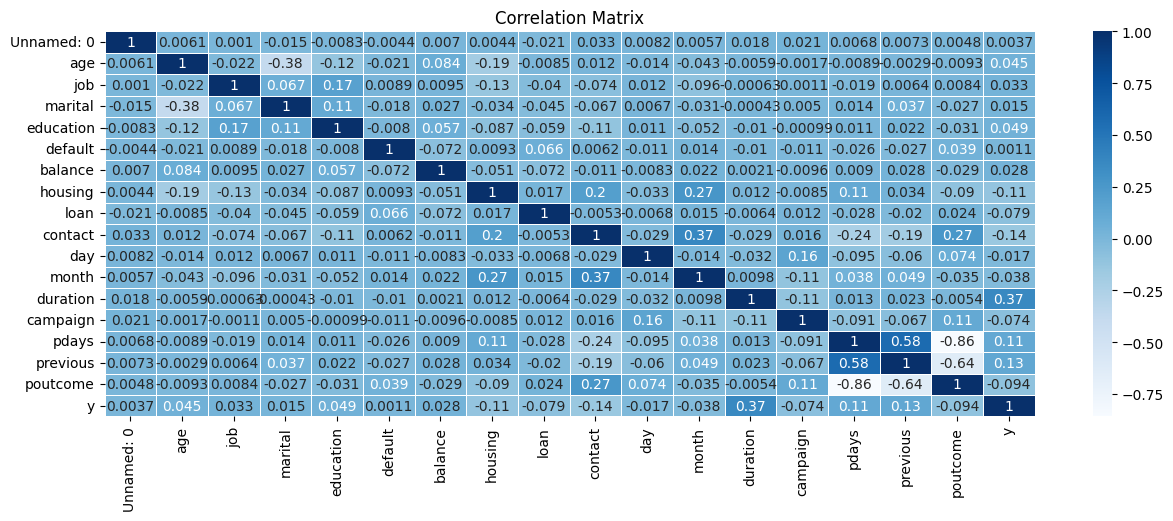

In [35]:
corr_mat = df1.corr()

plt.figure(figsize=(15, 5))
sns.heatmap(corr_mat, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()